# Day 2 - Assignment

## Problem 1
Calculate the number of lunar months in a year.

In [12]:
# Your code
import numpy as np
import astropy.constants as const
from astropy import units as u

# Constants
days_in_year = 365.25*u.day
lunar_month = 29.53 * u.day# days
sidereal_period = u.sday  # Earth's sidereal rotation in seconds
earth_mass = M_earth
earth_radius = R_earth.to(u.km).value

# Problem 1
lunar_months_in_year = days_in_year / lunar_month
lunar_months_in_year


<Quantity 12.36877751>

## Problem 2 
Calculate the distance of geostationary satellite from the center of the Earth, in the units of Earth radius, Geostationary satellite has timeperiod equal to Earth's sidereal rotation period.
$$\dfrac{GM}{r^3}=\dfrac{4\pi}{T^2}$$

In [32]:
u.sday.to(u.hour)

23.934469591666666

In [33]:
from astropy.constants import G, M_earth
from astropy import units as u
import numpy as np

# Define the sidereal period
sidereal_period = 23.9344696 * u.hour  
T = sidereal_period.to(u.s)  # Convert to seconds

# Calculate the orbital radius
r = ((G * M_earth * T**2) / (4 * np.pi**2))**(1/3)

# Convert r to Earth radii
r_in_earth_radii = r.to(u.R_earth)


In [34]:
r.to(u.km)

<Quantity 42164.16816978 km>

In [37]:
(1*u.R_earth).to(u.km)

<Quantity 6378.1 km>

In [35]:
r_in_earth_radii

<Quantity 6.61077251 earthRad>

## Problem 3 

Moon moves away from the Earth, due to tidal forces, at a rate of about 3.8 cm/year. It is at a distance of 3,84,000 km from Earth. We also know, universe expands at a rate given by Hubble’s law, which is about 72 km/s per Mpc. Calculate at what rate the moon moves away in the units of km/s per Mpc. Compare with the expansion of the Universe.

In [43]:
moon_rate_cm_per_year = 3.8 * (u.cm/u.year)
moon_rate_cm_per_year

<Quantity 3.8 cm / yr>

In [42]:
moon_rate_km_per_year = moon_rate_cm_per_year.to(u.km/u.year)
moon_rate_km_per_year

<Quantity 3.8e-05 km / yr>

In [44]:
moon_rate_km_per_s = moon_rate_km_per_year.to(u.km/u.s)
moon_rate_km_per_s

<Quantity 1.20414734e-12 km / s>

In [50]:
hubble_rate = 72*(u.km/u.s/u.Mpc)
hubble_rate

<Quantity 72. km / (Mpc s)>

In [51]:
moon_rate_in_hubble_units = moon_rate_km_per_s/hubble_rate
moon_rate_in_hubble_units

<Quantity 1.67242686e-14 Mpc>

## Problem 4

Eckart and Genzel measured the speeds of the stars close to the supermassive black holes at the centre of Milky Way. They found speeds about 300 km/s when these stars were at distance of 0.015 pc from the centre. Estimate the mass of the supermassive blackholes in units of M_sun. Speed of object around massive object is given by $$\nu = \sqrt{\dfrac{GM}{r}}$$

In [48]:
# Your code
v_star = 300 * u.km / u.s
r_star = 0.015 * u.pc

M = v_star**2 * r_star / const.G

M

<Quantity 2.02268403e+13 km2 kg pc / m3>

In [49]:
M.to(u.M_earth)

<Quantity 1.04507289e+11 earthMass>

## Problem 5

Ghez and others identified stars close to the super massive black hole at 0.01pc moving with acceleration of about $3\;mm/s^2$. Estimate the mass of the supermassive blackhole in units of M_sun. Acceleration of object around massive object is given by $$a=\dfrac{GM}{r^2}$$

In [111]:
a_star = 3 * 1e-3 * u.m / u.s**2  # Acceleration of stars
r_star = 0.01*u.pc

In [113]:
mass_blackhole = (a_star * r_star**2) / const.G
mass_blackhole

<Quantity 4494.85339287 pc2 kg / m2>

In [114]:
mass_blackhole.to(u.kg)

<Quantity 4.27973247e+36 kg>

In [115]:
mass_blackhole.to(u.M_sun)

<Quantity 2152339.17865991 solMass>

## Problem 6

Sidereal day on Mars is 24h 37m 22.7s and sidereal year on Mars is 686.980 d. 

Mass of the Mars is 0.107 that of the Earth. 
Radius of the Mars is  0.533 that of the Earth. 
Distance of the Mars from the Sun is 1.52368 AU.

- Calculate a solar day on Mars and define it as sol.
- Phobos is at the distance of 9376 km from the Mars. Calculate its period of revolution around Mars in terms of sol.
- Calculate the lunar month (in sol) due to Phobos on Mars.

In [74]:
# Your code
mars_day_sidereal = (24 * 3600 + 37 * 60 + 22.7)*u.s
mars_day_sidereal

<Quantity 88642.7 s>

In [75]:
mars_year_sidereal = 686.980*u.day
mars_year_sidereal

<Quantity 686.98 d>

In [82]:
mars_day_sidereal = 24 * 3600 + 37 * 60 + 22.7  # seconds
mars_year_sidereal = 686.980 * 24 * 3600  # seconds
solar_day_mars = mars_day_sidereal / (1 - mars_day_sidereal / mars_year_sidereal)
print("Solar day on Mars (sol):", solar_day_mars / 3600, "hours")

phobos_distance = 9376 * u.km
mars_mass = 0.107 * earth_mass
phobos_period = (4 * np.pi**2 * phobos_distance**3 / (G * mars_mass))**0.5
phobos_period_in_sol = (phobos_period / solar_day_mars).to(u.hour)
print("Phobos period (in sol):", phobos_period_in_sol)

Solar day on Mars (sol): 24.659799930008607 hours
Phobos period (in sol): 8.642730325361978e-05 h


In [89]:
sol = u.def_unit("sol", solar_day_mars)

In [91]:
sol.to(u.hour)

24.659799930008607

In [118]:
import astropy.units as u
from astropy.constants import G, M_earth, au

# Define data
sidereal_day_mars = (24 * u.hour) + (37 * u.minute) + (22.7 * u.second)
sidereal_year_mars = 686.980 * u.day
mass_mars = 0.107 * M_earth
distance_phobos = 9376 * u.km

# 1. Calculate the solar day (sol) on Mars
solar_day_mars = sidereal_day_mars / (1 - (sidereal_day_mars / sidereal_year_mars))

# Define "sol" as a custom unit
sol = u.def_unit("sol", solar_day_mars)

# 2. Calculate the period of Phobos in sol
phobos_period = (2 * np.pi * ((distance_phobos**3) / (G * mass_mars))**0.5).to(u.s)
phobos_period_in_sol = phobos_period.to(sol)

# 3. Calculate the lunar month due to Phobos in sol
lunar_month_phobos = (1 / ((1 / phobos_period_in_sol) - (1 / (1 * sol))))


In [119]:
solar_day_mars

<Quantity 24.65979993 h>

In [120]:
phobos_period_in_sol

<Quantity 0.31113829 sol>

In [121]:
lunar_month_phobos

<Quantity 0.45167018 sol>

## Problem 7

At what distance a 100 W lamp will provide the same flux as given by the Sun at the Earth. At what distance the lamp should be to match the flux given by Vega?$$F=\dfrac{L}{4\pi d^2}$$

In [124]:
# Your code
from astropy.constants import L_sun, au
from astropy import units as u

# Given data
lamp_luminosity = 100 * u.W  # Lamp power
solar_flux_earth = (L_sun / (4 * np.pi * au**2)).to(u.W / u.m**2)  # Sun's flux at Earth
vega_flux = 3.46e-8 * u.W / u.m**2  # Vega's flux at Earth (typical value)

# Distance for lamp to match Sun's flux at Earth
distance_for_sun_flux = ((lamp_luminosity / (4 * np.pi * solar_flux_earth))**0.5).to(u.m)

# Distance for lamp to match Vega's flux
distance_for_vega_flux = ((lamp_luminosity / (4 * np.pi * vega_flux))**0.5).to(u.m)

In [125]:
distance_for_sun_flux

<Quantity 0.07646091 m>

In [126]:
distance_for_vega_flux

<Quantity 15165.50995942 m>

## Problem 8

Calculate the distance between Mumbai and Mombasa in R_earth and in km.

In [100]:
# Your code
from astropy.coordinates import EarthLocation
import astropy.units as u
import numpy as np

# Get Earth locations for Mumbai and Mombasa
mumbai = EarthLocation.of_address("Mumbai, India")
mombasa = EarthLocation.of_address("Mombasa, Kenya")

# Extract latitude and longitude in radians
lat1, lon1 = np.radians([mumbai.lat.deg, mumbai.lon.deg])
lat2, lon2 = np.radians([mombasa.lat.deg, mombasa.lon.deg])

# Radius of Earth
R_earth = 6371 * u.km  # Mean radius of Earth in kilometers

# Haversine formula to compute the great-circle distance
dlat = lat2 - lat1
dlon = lon2 - lon1
a = np.sin(dlat / 2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2)**2
c = 2 * np.arcsin(np.sqrt(a))
distance_km = c * R_earth

# Convert distance to Earth radii
distance_rearth = distance_km / R_earth

In [102]:
distance_km.to(u.km)

<Quantity 4449.63005892 km>

In [104]:
distance_rearth

<Quantity 0.69841941>

## Problem 9
Calculate angular separation between stars ‘Fomalhaut’, ‘Canopus’ and ‘Achernar’.

In [108]:
# Your code
from astropy.coordinates import SkyCoord
Fomalhaut=SkyCoord.from_name('Fomalhaut')
Canopus=SkyCoord.from_name('Canopus')
Achernar=SkyCoord.from_name('Achernar')
sep_1=Achernar.separation(Canopus)
sep_2=Achernar.separation(Fomalhaut)
sep_3=Canopus.separation(Fomalhaut)

In [106]:
sep_1

<Angle 39.40922869 deg>

In [109]:
sep_2

<Angle 39.10961152 deg>

In [110]:
sep_3

<Angle 78.49624631 deg>

## Problem 10
Calculate the four sides of the Square of Pegasus. At its vertex are the stars: ‘Alpheratz’, ‘Scheat’, ‘Markab’ and ‘Algenib’.

In [138]:
# Your code
from astropy.coordinates import SkyCoord
import astropy.units as u

# Retrieve coordinates for the stars at the vertices of the Square of Pegasus
alpheratz = SkyCoord.from_name("Alpheratz")
scheat = SkyCoord.from_name("Scheat")
markab = SkyCoord.from_name("Markab")
algenib = SkyCoord.from_name("Algenib")

# Calculate the angular distances between the vertices
side_1 = alpheratz.separation(scheat)  # Between Alpheratz and Scheat
side_2 = scheat.separation(markab)     # Between Scheat and Markab
side_3 = markab.separation(algenib)    # Between Markab and Algenib
side_4 = algenib.separation(alpheratz) # Between Algenib and Alpheratz

# Display the sides in degrees
sides = [side_1.to(u.deg), side_2.to(u.deg), side_3.to(u.deg), side_4.to(u.deg)]

In [134]:
side_1.to(u.deg)

<Angle 14.2087767 deg>

In [135]:
side_2.to(u.deg)

<Angle 12.87954791 deg>

In [136]:
side_3.to(u.deg)

<Angle 16.5160657 deg>

In [137]:
side_4.to(u.deg)

<Angle 13.95174454 deg>

## Problem 11 - Miller's Planet

In the movie Interstellar, Miller's planet experiences time dilation due to its proximity to a black hole, such that 1 hour on Miller's planet equals 7 years on Earth.

Edwin Hubble first presented his findings about discovering new galaxies during a meeting at Americal Astronomical Society on 1st Jan 1925. 

Use astropy.time module to evaluate how many days/years it has been since this meeting. Assume today's date is 25th December 2024.

Use the def_unit function of astropy to create a new unit definition, say, miller_hour which is equivalent to 7 earth years. 

Test your unit definition by using miller_hour.to(u.year) which should give the output 7.

Find out how many hours it has been on Miller's planet since Hubble's meeting.


In [54]:
miller_hour = u.def_unit('miller_hour', 7*u.year)
2*miller_hour

<Quantity 2. miller_hour>

In [55]:
miller_hour.to(u.year)

7.0

In [56]:
a = 2*miller_hour

In [57]:
a.to(u.year)

<Quantity 14. yr>

In [58]:
miller_hour.find_equivalent_units()

Primary name,Unit definition,Aliases
a,3.15576e+07 s,annum
d,86400 s,day
fortnight,1.2096e+06 s,
h,3600 s,"hour, hr"
min,60 s,minute
s,irreducible,second
sday,86164.1 s,
wk,604800 s,week
yr,3.15576e+07 s,year


In [59]:
'30 November 1609'

'30 November 1609'

In [60]:
from astropy.time import Time

hubble_date = Time('1925-01-01')
today_date = Time('2024-12-25')

/Users/pratik/opt/miniconda3/envs/SETU/lib/python3.11/site-packages/erfa/core.py:133: ErfaWarning: ERFA function "dtf2d" yielded 1 of "dubious year (Note 6)"
  warn(f'ERFA function "{func_name}" yielded {wmsg}', ErfaWarning)


In [61]:
(today_date - hubble_date).to(u.year)

/Users/pratik/opt/miniconda3/envs/SETU/lib/python3.11/site-packages/erfa/core.py:133: ErfaWarning: ERFA function "utctai" yielded 1 of "dubious year (Note 3)"
  warn(f'ERFA function "{func_name}" yielded {wmsg}', ErfaWarning)


<Quantity 99.98083622 yr>

In [62]:
earth_time = (today_date - hubble_date).to(u.year)

In [63]:
miller_time = earth_time.to(miller_hour)
miller_time

<Quantity 14.2829766 miller_hour>

## Problem 12 - Curve Fitting

You are provided with a noisy dataset that represents some physical phenomenon. The data contains underlying exponential, logarithmic and polynomical components. Your task is to apply curve fitting techniques to this data using exponential, logarithmic and polynomical functions, and determine the best fitting model.

The simulated dataset contains two columns `x`(independent variable) and `y`(dependent variable). Your objective is to fit the data to three different models and evaluate the goodness of the fit.

1. Load the data from provided csv file `astronomy_fit_data.csv`
2. Create three functions for Exponential model, logarithmic model and polynomial model (degree 4)

You can use these equations for your model


\begin{align*}
\textbf{Exponential:} \quad & y(x) = G \cdot e^{H \cdot x} \\
\\
\textbf{Logarithmic:} \quad & y(x) = D \cdot \log(E \cdot x + F) \\
\\
\textbf{Polynomial:} \quad & y(x) = I \cdot x^4 + J \cdot x^3 + K \cdot x^2 + L \cdot x
\end{align*}



For the initial conditions you can use these values

\begin{align}
\textbf{Exponential:} \quad & G = 10, \quad H = -0.1 \\
\textbf{Logarithmic:} \quad & D = 8, \quad E = 2, \quad F = 2 \\
\textbf{Polynomial:} \quad & I = 0.5, \quad J = -2, \quad K = 6, \quad L = -15
\end{align}


Visualise the data first.

Then visualise all three fits in the same plot.

Use $R^2$ value for eachmodel to evaluate the goodness and determine which function is the best fit using this value.

Try using different initial condition values to determine if the goodness of the fit increases or decreases.

It is possible that you will face the below error when trying to fit the curve.

```RuntimeError: Optimal parameters not found: Number of calls to function has reached maxfev = 800.```

Debugging is part of learning, so try to find solution to how you can mitigate this error.


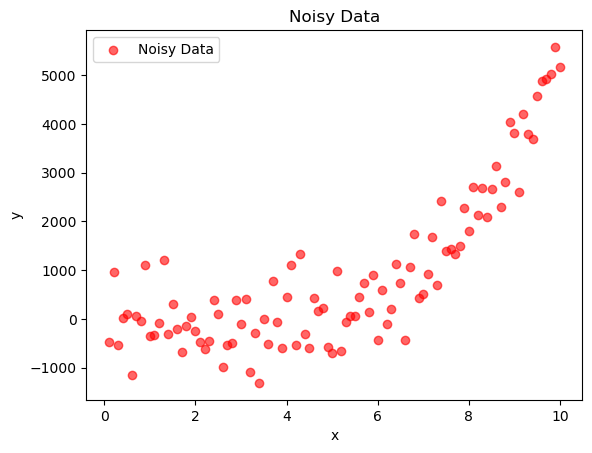

In [64]:
# Your code 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('astronomy_fit_data.csv')

# Extract x and y values
x = df['x']
y = df['y']

# Plot the noisy data
plt.scatter(x, y, label="Noisy Data", color="r", alpha=0.6)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Noisy Data')
plt.legend()
plt.show()

/Users/pratik/opt/miniconda3/envs/SETU/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


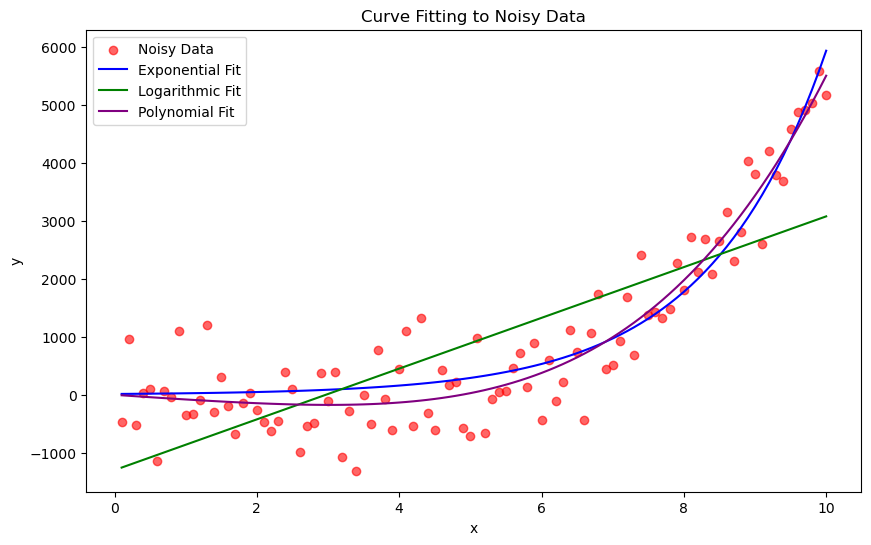

In [65]:
from scipy.optimize import curve_fit
import numpy as np
import matplotlib.pyplot as plt

# Exponential function
def exp_func(x, G, H):
    return G * np.exp(H * x)

# Logarithmic function
def log_func(x, D, E, F):
    return D * np.log(E * x + F)


# Polynomial function (4th degree)
def poly_func(x, I, J, K, L):
    return I * x**4 + J * x**3 + K * x**2 + L * x

# Providing better initial guesses and increasing maxfev
p0_exp = [10, -0.1]  # Reasonable initial guesses for exponential
p0_log = [8, 2, 2]   # Reasonable initial guesses for logarithmic
p0_poly = [0.5, -2, 6, -15]  # Reasonable initial guesses for polynomial

# Fit the exponential model with increased maxfev
params_exp, params_exp_cov = curve_fit(exp_func, x, y, p0=p0_exp, maxfev=10000)

# Fit the logarithmic model with increased maxfev
params_log, params_log_cov = curve_fit(log_func, x, y, p0=p0_log, maxfev=10000)


# Fit the polynomial model (degree 4) with increased maxfev
params_poly, params_poly_cov = curve_fit(poly_func, x, y, p0=p0_poly, maxfev=10000)

# Plot the results
plt.figure(figsize=(10, 6))

# Plot the noisy data
plt.scatter(x, y, label="Noisy Data", color="r", alpha=0.6)

# Plot the fits
x_fit = np.linspace(0.1, 10, 100)
plt.plot(x_fit, exp_func(x_fit, *params_exp), label="Exponential Fit", color="b")
plt.plot(x_fit, log_func(x_fit, *params_log), label="Logarithmic Fit", color="g")
plt.plot(x_fit, poly_func(x_fit, *params_poly), label="Polynomial Fit", color="purple")

plt.xlabel('x')
plt.ylabel('y')
plt.title('Curve Fitting to Noisy Data')
plt.legend()
plt.show()


In [66]:
# Function to calculate R^2 value
def r_squared(y_true, y_fit):
    return 1 - np.sum((y_true - y_fit)**2) / np.sum((y_true - np.mean(y_true))**2)

# Calculate R^2 for each model
y_exp_fit = exp_func(x, *params_exp)
y_log_fit = log_func(x, *params_log)
y_poly_fit = poly_func(x, *params_poly)

r2_exp = r_squared(y, y_exp_fit)
r2_log = r_squared(y, y_log_fit)
r2_poly = r_squared(y, y_poly_fit)

# Print R^2 values
print(f'R^2 for Exponential Fit: {r2_exp:.4f}')
print(f'R^2 for Logarithmic Fit: {r2_log:.4f}')
print(f'R^2 for Polynomial Fit: {r2_poly:.4f}')

R^2 for Exponential Fit: 0.8697
R^2 for Logarithmic Fit: 0.6120
R^2 for Polynomial Fit: 0.8853


## Problem 13 - Galactic Time Zones

The Milky Way rotates around its center such that the Sun takes approximately 225 million years to complete one orbit, known as the "Galactic Year."  

- Using the `astropy.units` module, define a new time unit called `galactic_year`.  
- Calculate how many Galactic Years have passed since the Solar System's formation (~4.6 billion years ago).  
- Bonus: If one Galactic Year is divided into 12 Galactic Months, how many Galactic Months has the Solar System existed?

In [67]:
# Your code 
import astropy.units as u

# Define a new time unit for the Galactic Year
galactic_year = 225e6 * u.yr  # 225 million years

# Solar System's formation age in years
solar_system_age = 4.6e9 * u.yr  # 4.6 billion years

# Calculate the number of Galactic Years since the formation of the Solar System
galactic_years = solar_system_age / galactic_year
print(f"Galactic Years since Solar System formation: {galactic_years:.2f}")

# Bonus: Calculate the number of Galactic Months (1 Galactic Year = 12 Galactic Months)
galactic_months = galactic_years * 12
print(f"Galactic Months since Solar System formation: {galactic_months:.2f}")

Galactic Years since Solar System formation: 20.44
Galactic Months since Solar System formation: 245.33


## Problem 14 - Supernova Timing
Type Ia supernovae are standard candles used to measure cosmic distances. Their luminosity fades over time according to the formula $$ L(t) = L_0 e^{-kt} $$

where $ L_0 $ is the initial luminosity and $ k $ is the decay constant. Assume $ L_0 = 10^9 $ $L_\odot$ and $ k = 0.693 $ and $t$ is time in days.

To solve for the time \( t \) when the luminosity drops to $ L(t) = L_{\text{target}} = $ $ 10^6 $ $L_\odot$, we rearrange the equation:

$$
L(t) = L_0 e^{-kt} \quad \Rightarrow \quad t = \frac{\ln(L_0 / L(t))}{k}
$$

- Using `numpy` and `matplotlib`, plot the luminosity decay over 50 days.  
- Calculate how long it will take for the luminosity to drop to $ 10^6 $ $L_\odot$

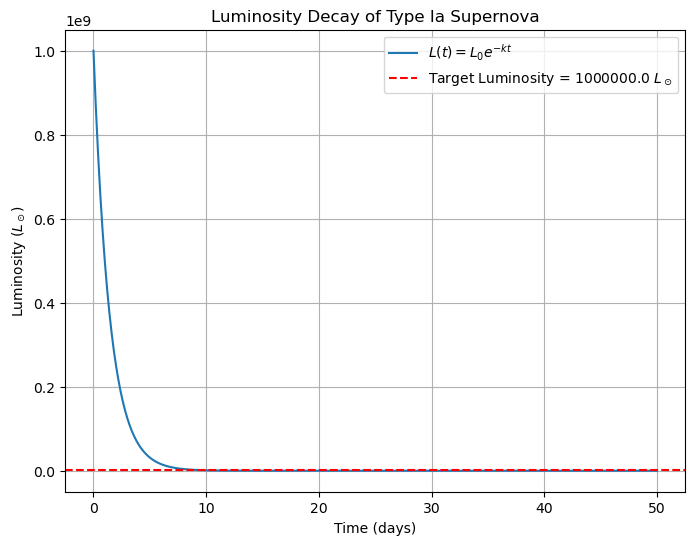

Time for luminosity to drop to 1000000.0 L_sun: 9.97 days


In [68]:
import numpy as np
import matplotlib.pyplot as plt

# Given constants
L0 = 1e9  # Initial luminosity in L_sun
k = 0.693  # Decay constant in 1/day
L_target = 1e6  # Target luminosity in L_sun

# Time values (0 to 100 days)
t = np.linspace(0, 50, 500)

# Luminosity decay function L(t)
L_t = L0 * np.exp(-k * t)

# Plot the luminosity decay
plt.figure(figsize=(8, 6))
plt.plot(t, L_t, label=r"$L(t) = L_0 e^{-kt}$")
plt.axhline(L_target, color='r', linestyle='--', label=f"Target Luminosity = {L_target} $L_\\odot$")
plt.title("Luminosity Decay of Type Ia Supernova")
plt.xlabel("Time (days)")
plt.ylabel("Luminosity ($L_\\odot$)")
plt.legend()
plt.grid(True)
plt.show()

# Calculate time for luminosity to drop to L_target
t_target = np.log(L0 / L_target) / k
print(f"Time for luminosity to drop to {L_target} L_sun: {t_target:.2f} days")


## Problem 15 - Calculating the Area Spanned by Three Stars


Consider three stars in the sky, each with known Right Ascension (RA) and Declination (Dec) coordinates in the International Celestial Reference System (ICRS). You are tasked with calculating the area spanned by these three stars, forming a [spherical triangle](https://en.wikipedia.org/wiki/Spherical_trigonometry#Notation).



Given the coordinates of the stars in RA and Dec, your goal is to calculate the angular separation between each pair of stars, then use the law of cosines to find the angles of the spherical triangle formed by the stars. Finally, apply the spherical excess formula to determine the area of the spherical triangle on the unit sphere.

### Coordinates of the Stars:

1. **Pleiades**: RA = 03h 48m 30.4s, Dec = +24°11'44.8"
2. **Aldebaran**: RA = 04h 37m 22.7s, Dec = +16°33'36.4"
3. **Capella**: RA = 05h 18m 34.2s, Dec = +46°01'26.1"

### Steps to Solve:

1. **Convert the RA and Dec** of the stars into SkyCoord objects in the ICRS frame using Astropy.
2. **Calculate the angular separation** between each pair of stars.
3. **Convert the angular separations** from degrees to radians.
4. **[Apply the law of cosines](https://en.wikipedia.org/wiki/Spherical_trigonometry#Supplemental_cosine_rules)** to calculate the angles at each vertex of the spherical triangle formed by the stars:
   - Formula for the angles:
     - For angle 1 (opposite side `sep12` =`pleiades.separation(aldebaran)`):
       $$ \cos(	\theta_1) = \dfrac{\cos(	\text{sep23}) - \cos(	\text{sep12}) \cdot \cos(	\text{sep31})}{\sin(	\text{sep12}) \cdot \sin(	\text{sep31})} $$
     - For angle 2 (opposite side `sep23` = `aldebaran.separation(capella)`):
       $$ \cos(	\theta_2) = \dfrac{\cos(	\text{sep31}) - \cos(	\text{sep12}) \cdot \cos(	\text{sep23})}{\sin(	\text{sep12}) \cdot \sin(	\text{sep23})} $$
     - For angle 3 (opposite side `sep31` = `capella.separation(pleiades)`):
       $$ \cos(	\theta_3) = \dfrac{\cos(	\text{sep12}) - \cos(	\text{sep31}) \cdot \cos(	\text{sep23})}{\sin(	\text{sep31}) \cdot \sin(	\text{sep23})} $$

5. **Calculate the angles** using the arccosine function. Once you find $\cos(\theta)$ you can use this code line to find theta values `theta1 = np.arccos(np.clip(cos_angle1, -1.0, 1.0))` Here the np.clip function is used to prevent errors due to numerical inaccuracies when computing the inverse cosine. 
6. **Apply the spherical excess formula** to find the area of the spherical triangle:
   $$ 	\text{Area} = 	\theta_1 + 	\theta_2 + 	\theta_3 - \pi $$

   The area is the spherical excess in **steradians**.



In [69]:
# Your code 
from astropy.coordinates import SkyCoord
import astropy.units as u
import numpy as np

# Define the coordinates of the three stars in RA, Dec (in degrees)
pleiades = SkyCoord(ra='03h 48m30.4s', dec="+24°11' 44.8", frame='icrs')  # Example: RA, Dec of the Pleiades
aldebaran = SkyCoord(ra='04h 37m22.7s', dec="+16°33'36.4", frame='icrs')  # Example: RA, Dec of Aldebaran
capella = SkyCoord(ra='05h 18m34.2s', dec="+46°01'26.1", frame='icrs')  # Example: RA, Dec of a star

# Calculate the angular separations between the stars
sep12 = pleiades.separation(aldebaran)  # Separation between star 1 and star 2
sep23 = aldebaran.separation(capella)  # Separation between star 2 and star 3
sep31 = capella.separation(pleiades)  # Separation between star 3 and star 1

# Convert the angular separations to radians
sep12_rad = sep12.to(u.rad).value
sep23_rad = sep23.to(u.rad).value
sep31_rad = sep31.to(u.rad).value

# Calculate the angles at the vertices of the spherical triangle (using the law of cosines)
# Law of cosines formula: cos(c) = cos(a)cos(b) + sin(a)sin(b)cos(C)
# where a, b, and c are the sides of the triangle, and C is the angle opposite side c.

# Now, apply spherical excess formula to calculate the area
# First calculate the angles at each vertex
cos_angle1 = (np.cos(sep23_rad) - np.cos(sep12_rad) * np.cos(sep31_rad)) / (np.sin(sep12_rad) * np.sin(sep31_rad))
cos_angle2 = (np.cos(sep31_rad) - np.cos(sep12_rad) * np.cos(sep23_rad)) / (np.sin(sep12_rad) * np.sin(sep23_rad))
cos_angle3 = (np.cos(sep12_rad) - np.cos(sep31_rad) * np.cos(sep23_rad)) / (np.sin(sep31_rad) * np.sin(sep23_rad))

angle1 = np.arccos(np.clip(cos_angle1, -1.0, 1.0))
angle2 = np.arccos(np.clip(cos_angle2, -1.0, 1.0))
angle3 = np.arccos(np.clip(cos_angle3, -1.0, 1.0))

# Calculate the spherical excess (area of the spherical triangle)
spherical_excess = angle1 + angle2 + angle3 - np.pi

# The area on a unit sphere is equal to the spherical excess in steradians
print(f"Spherical Triangle Area: {spherical_excess:.4f} steradians")


Spherical Triangle Area: 0.0608 steradians


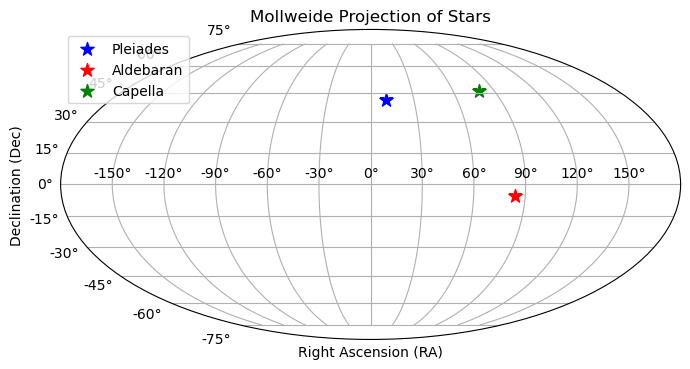

In [72]:
import matplotlib.pyplot as plt
from astropy.coordinates import SkyCoord
import astropy.units as u

# Example SkyCoord objects for Pleiades, Aldebaran, and Capella
pleiades = SkyCoord(ra=10.684*u.deg, dec=41.269*u.deg, frame='icrs')
aldebaran = SkyCoord(ra=83.822*u.deg, dec=-5.391*u.deg, frame='icrs')
capella = SkyCoord(ra=79.172*u.deg, dec=45.997*u.deg, frame='icrs')

# Convert RA, Dec to radians
ra_pleiades = pleiades.ra.to(u.rad).value
dec_pleiades = pleiades.dec.to(u.rad).value
ra_aldebaran = aldebaran.ra.to(u.rad).value
dec_aldebaran = aldebaran.dec.to(u.rad).value
ra_capella = capella.ra.to(u.rad).value
dec_capella = capella.dec.to(u.rad).value

# Plotting using Mollweide projection
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='mollweide')

# Plot the stars
ax.scatter(ra_pleiades, dec_pleiades, label='Pleiades', color='blue', s=100, marker='*')
ax.scatter(ra_aldebaran, dec_aldebaran, label='Aldebaran', color='red', s=100, marker='*')
ax.scatter(ra_capella, dec_capella, label='Capella', color='green', s=100, marker='*')

# Adding labels and title
ax.legend(loc='upper left')
ax.set_xlabel('Right Ascension (RA)')
ax.set_ylabel('Declination (Dec)')
ax.set_title('Mollweide Projection of Stars')
ax.grid()
plt.show()
